### Imports

In [1]:
import os
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import pandas as pd

# plotting modules
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

### Load Data

In [31]:
df = pd.read_csv('dataset/clean_sample_data.csv', index_col=0)

### Preview data and shape

In [32]:
df.head(5)

,Age,Gender,Height,Weight,BMI,Waist,Hip,Waist/Hip Ratio,BodyTemperature,SpO2,BloodPressure(sys),BloodPressure(dia),BloodGlucose,PulseRate,BloodUricAcid,Color
0,59,1,159.0,52.7,20.85,85.0,80,1.06,95.00,96.0,138,78,234.0,94,4.3,3
1,60,1,164.0,73.9,27.48,95.0,99,0.96,96.26,96.0,128,67,93.6,62,5.8,2
2,58,1,164.0,83.7,31.12,102.0,103,0.99,95.00,96.0,140,81,133.2,60,7.0,3
3,50,0,143.0,45.1,22.05,76.0,89,0.85,97.52,99.0,102,65,75.6,82,3.6,2
4,56,1,160.0,64.9,25.35,87.0,91,0.96,96.44,96.0,155,98,223.2,92,5.0,3


In [33]:
df.shape

(271, 16)

### Get Percentage of missing data in each column

In [34]:
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

SpO2                  0.37
Color                 0.00
BloodUricAcid         0.00
PulseRate             0.00
BloodGlucose          0.00
BloodPressure(dia)    0.00
BloodPressure(sys)    0.00
BodyTemperature       0.00
Waist/Hip Ratio       0.00
Hip                   0.00
Waist                 0.00
BMI                   0.00
Weight                0.00
Height                0.00
Gender                0.00
Age                   0.00
dtype: float64

### Show unique values of each non numeric columns

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [36]:
data_iter = df.copy(deep=True)

# Init
ii_imp = IterativeImputer(
    estimator=ExtraTreesRegressor(), max_iter=10, random_state=1121218
)

# Tranform
data_iter.loc[:, :] = ii_imp.fit_transform(data_iter)

In [37]:
data_iter.isnull().sum()

Age                   0
Gender                0
Height                0
Weight                0
BMI                   0
Waist                 0
Hip                   0
Waist/Hip Ratio       0
BodyTemperature       0
SpO2                  0
BloodPressure(sys)    0
BloodPressure(dia)    0
BloodGlucose          0
PulseRate             0
BloodUricAcid         0
Color                 0
dtype: int64

### Imputation

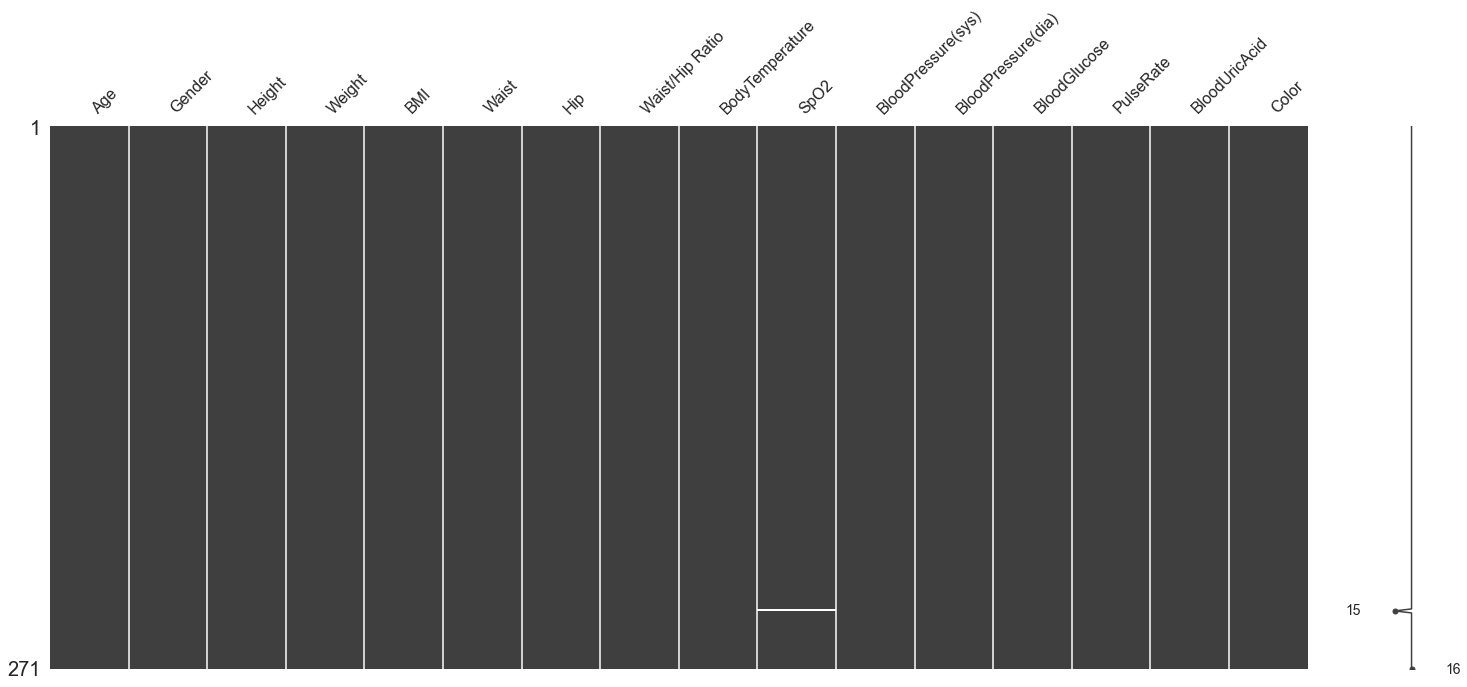

In [38]:
import missingno as msno  # # pip install missingno

# Plot correlation heatmap of missingness
msno.matrix(df);

In [8]:
from sklearn.impute import KNNImputer

In [9]:
data = df.copy(deep=True)

In [20]:
knn_imp = KNNImputer(n_neighbors=3)

# Fit/transform
data.loc[:, :] = knn_imp.fit_transform(data)

In [22]:
# check missing values
data.loc[:, :] = knn_imp.fit_transform(data)

In [14]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Gender                0
Height                0
Weight                0
BMI                   0
Waist                 0
Hip                   0
Waist/Hip Ratio       0
BodyTemperature       0
SpO2                  0
BloodPressure(sys)    0
BloodPressure(dia)    0
BloodGlucose          0
PulseRate             0
BloodUricAcid         0
Color                 0
dtype: int64

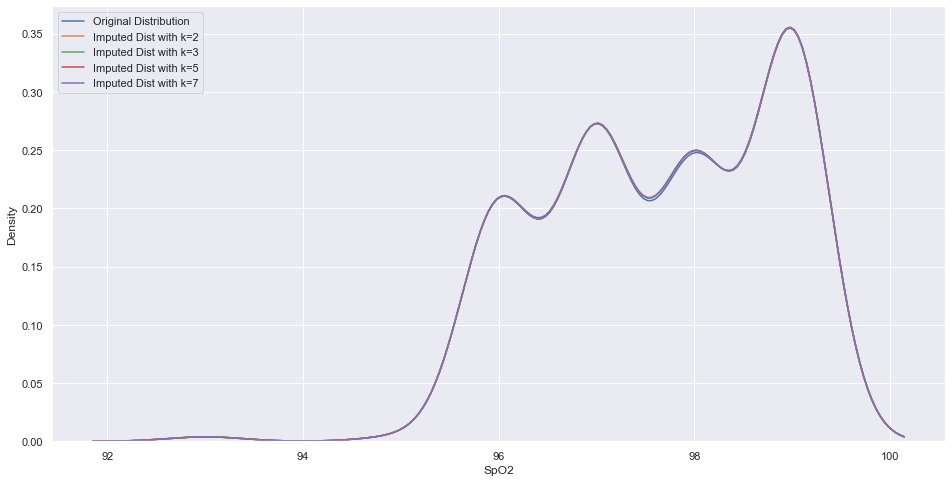

In [19]:
n_neighbors = [2, 3, 5, 7]

fig, ax = plt.subplots(figsize=(16, 8))
# Plot the original distribution
sns.kdeplot(df.SpO2, label="Original Distribution")
for k in n_neighbors:
    knn_imp = KNNImputer(n_neighbors=k)
    df.loc[:, :] = knn_imp.fit_transform(df)
    sns.kdeplot(data.SpO2, label=f"Imputed Dist with k={k}")

plt.legend();

O:\Technical\Editors\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
O:\Technical\Editors\Anaconda\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
O:\Technical\Editors\Anaconda\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
O:\Technical\Editors\Anaconda\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

O:\Technical\Editors\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
O:\Technical\Editors\Anaconda\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
O:\Technical\Editors\Anaconda\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
O:\Technical\Editors\Anaconda\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

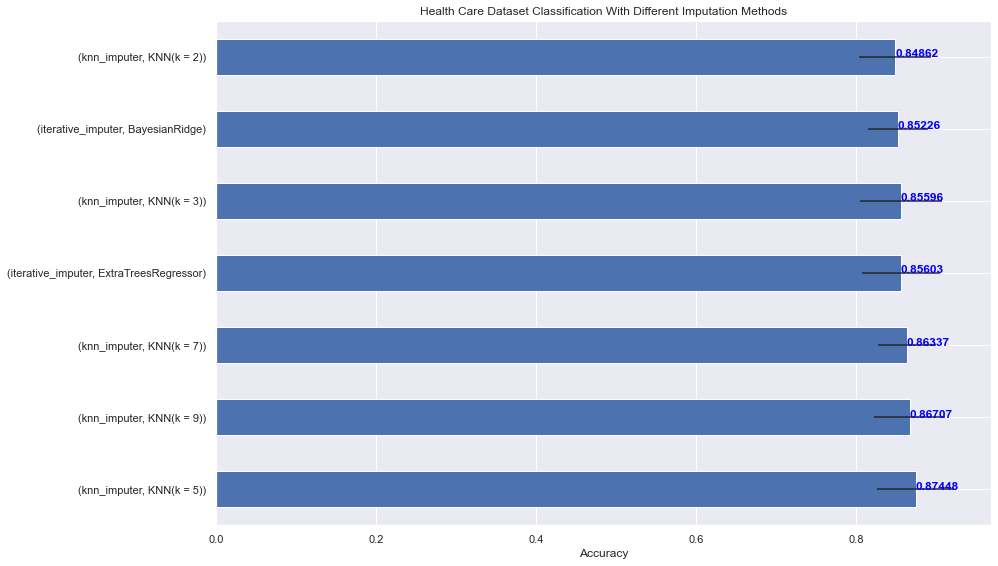

In [59]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


X_full = df.drop("Color", axis=1).copy()
y_full = df["Color"].values.reshape(-1, 1)

# Set global configs
cv = 5
scoring = "accuracy"
state = 1121218
forest = RandomForestClassifier()

# Store IterativeImputer scores
ii_scores = pd.DataFrame()
for estimator in [BayesianRidge(), ExtraTreesRegressor()]:
    pipe = make_pipeline(
        IterativeImputer(estimator=estimator, random_state=state), forest
    )
    ii_scores[estimator.__class__.__name__] = cross_val_score(
        pipe, X_full, y_full, scoring=scoring, cv=cv
    )

# Store KNN scores
knn_scores = pd.DataFrame()
n_neighbors = [2, 3, 5, 7, 9]
for k in n_neighbors:
    pipe = make_pipeline(KNNImputer(n_neighbors=k), forest)
    knn_scores[f"KNN(k = {k})"] = cross_val_score(
        pipe, X_full, y_full, scoring=scoring, cv=cv
    )

# Combines scores into a single DF
final_scores = pd.concat(
    [ii_scores, knn_scores],
    axis=1,
    keys=["iterative_imputer", "knn_imputer"],
)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

means, errors = final_scores.mean().sort_values(ascending=False), final_scores.std()
means.plot.barh(xerr=errors, ax=ax)

ax.set_title("Health Care Dataset Classification With Different Imputation Methods")
ax.set_xlabel("Accuracy")
ax.set_yticks(np.arange(means.shape[0]))
for i, v in enumerate(means):
    ax.text((round(v,5)), i, str((round(v,5))), color='blue', fontweight='bold')

plt.tight_layout(pad=1)

In [ ]:
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

In [58]:
for i, v in enumerate(means):
    print(v)

0.8744781144781143
0.8743434343434343
0.8707744107744109
0.8707744107744106
0.867003367003367
0.8596632996632996
0.8595959595959597
